# 自然言語処理：RNN

**自然言語処理**

**RNNを活用**

**計算結果が正確出来るように学習させる**

**ライブラリはNmupyを活用**


iters:0
Loss:1.0574888630087576
Pred:[1 1 1 0 1 1 1 0]
True:[0 1 0 0 1 1 0 1]
24 + 53 = 238
------------
iters:100
Loss:0.93840194387361
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 1 1 0 0 0]
17 + 71 = 0
------------
iters:200
Loss:1.0492934011172128
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 0 1 0 1 1 0]
28 + 58 = 255
------------
iters:300
Loss:0.987756614460655
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 1 1 0 0 1]
83 + 70 = 0
------------
iters:400
Loss:1.0257974017753393
Pred:[1 1 1 1 1 1 1 1]
True:[1 1 0 1 0 1 0 0]
92 + 120 = 255
------------
iters:500
Loss:0.8739734461179863
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 1 1 0 1 1]
95 + 28 = 255
------------
iters:600
Loss:0.9541961251558709
Pred:[1 0 1 0 1 1 1 0]
True:[1 0 1 1 1 0 1 0]
71 + 115 = 174
------------
iters:700
Loss:0.9158197635782452
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 1 1 1 1 1]
70 + 89 = 255
------------
iters:800
Loss:1.1588435420793362
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 0 0 0 0 0]
6 + 122 = 255
------------
iters:900
Loss:0.9997575046143101
Pred:[0 0 

iters:7600
Loss:0.012423517613164476
Pred:[1 0 0 0 0 1 0 0]
True:[1 0 0 0 0 1 0 0]
86 + 46 = 132
------------
iters:7700
Loss:0.006641647201525642
Pred:[1 0 0 0 1 0 0 1]
True:[1 0 0 0 1 0 0 1]
40 + 97 = 137
------------
iters:7800
Loss:0.005150869029812557
Pred:[0 1 1 1 1 1 1 1]
True:[0 1 1 1 1 1 1 1]
88 + 39 = 127
------------
iters:7900
Loss:0.011971159915162762
Pred:[0 1 0 0 1 0 0 0]
True:[0 1 0 0 1 0 0 0]
52 + 20 = 72
------------
iters:8000
Loss:0.0035035476232926368
Pred:[1 0 1 1 1 1 1 1]
True:[1 0 1 1 1 1 1 1]
69 + 122 = 191
------------
iters:8100
Loss:0.005418344111963289
Pred:[1 1 0 1 1 1 0 1]
True:[1 1 0 1 1 1 0 1]
94 + 127 = 221
------------
iters:8200
Loss:0.0007469380516236227
Pred:[1 0 0 0 0 0 0 0]
True:[1 0 0 0 0 0 0 0]
15 + 113 = 128
------------
iters:8300
Loss:0.0005997743234033775
Pred:[0 1 0 0 0 0 1 0]
True:[0 1 0 0 0 0 1 0]
51 + 15 = 66
------------
iters:8400
Loss:0.009238278610316347
Pred:[0 0 0 1 0 0 1 0]
True:[0 0 0 1 0 0 1 0]
12 + 6 = 18
------------
iters:85

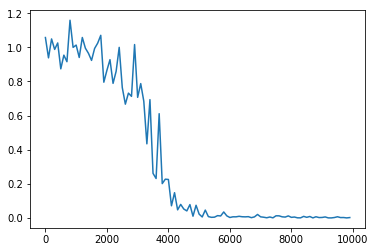

In [2]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt


def d_tanh(x):
    return 1/(np.cosh(x) ** 2)

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化
# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

#学習
for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.least_square(dd, y[:,t])
        
        delta_out[:,t] = functions.d_least_square(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])


        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

#学習をグラフ表示
lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()